In [314]:
library(tidyverse)
library(dplyr)
library(cowplot)
library(grid)
library(gridExtra)
library(ggplot2)
library(egg)
library(reshape2)

In [315]:
motif_df = read.csv('../Output/SH3_PWM_scan_HRR25Orthologs_MSS.csv')

In [316]:


motif_df <- motif_df %>%
              add_column(OverTh = 
                           if_else(.$MSS > 0.609, 1, 0),
                         .after="MSS")

head(motif_df)
unique(motif_df$PWM_name)

,Gene_name,Start_End,PWM_name,PWM_hits,MSS,OverTh
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,N.dairenensis_NDAI0F01640_DupA,558-565,RVS167_ClassII,APALPPRQ,0.9658484,1
2,N.dairenensis_NDAI0F01640_DupA,558-564,LSB1_classII,APALPPR,0.9635499,1
3,N.dairenensis_NDAI0F01640_DupA,558-565,YSC84,APALPPRQ,0.9296789,1
4,N.dairenensis_NDAI0F01640_DupA,558-565,LSB3,APALPPRQ,0.8722699,1
5,N.dairenensis_NDAI0F01640_DupA,559-565,PIN3_classII,PALPPRQ,0.8186790,1
6,S.cerevisiae_YPL204W_DupA,475-483,CYK3_classI,MRSNPQQPP,0.7949375,1


[1] "RVS167_ClassII"       "LSB1_classII"         "YSC84"               
 [4] "LSB3"                 "PIN3_classII"         "CYK3_classI"         
 [7] "HSE1"                 "HOF1"                 "PEX13_classIIA"      
[10] "MYO5"                 "MYO3"                 "NBP2_PXXP"           
[13] "SLA1-3"               "BZZ1-2"               "LSB1_classI"         
[16] "RVS167_ClassI"        "FUS1"                 "SHO1"                
[19] "PEX13_classIIB"       "BEM1-1"               "SLA1-1_classI"       
[22] "BBC1_classIIcombined" "BEM1-2_PXXP"          "SLA1-2_classII"      
[25] "BOI2"                 "BZZ1-1"               "CYK3_classII"        
[28] "PIN3_classI"          "ABP1"                 "BOI1"

In [366]:
motif_l = c(
'RVS167_ClassII',
    'LSB1_classII',
    'YSC84',
    'LSB3',
    'PIN3_classII',
    'CYK3_classI',
    'HSE1',
    'HOF1',
    'PEX13_classIIA',
    'MYO5',
    'MYO3',
    'NBP2_PXXP',
    'SLA1-3',
    'BZZ1-2',
    'LSB1_classI',
    'RVS167_ClassI',
    'FUS1',
    'SHO1',
    'PEX13_classIIB',
    'BEM1-1',
    'SLA1-1_classI',
    'BBC1_classIIcombined',
    'BEM1-2_PXXP',
    'SLA1-2_classII',
    'BOI2',
    'BZZ1-1',
    'CYK3_classII',
    'PIN3_classI',
    'ABP1',
    'BOI1'
)


In [367]:
MSS =motif_df %>% group_by(Gene_name,PWM_name) %>% summarise(MSSmax = max(MSS),MSSsum = sum(MSS),MSSsumoverTh=sum(MSS*OverTh),n=n(),n_th =sum(OverTh)   )%>%separate(Gene_name,sep="_",into=c("Species","Gene","Pos"))

head(MSS)


`summarise()` has grouped output by 'Gene_name'. You can override using the
`.groups` argument.
Warning message:
“Expected 3 pieces. Additional pieces discarded in 120 rows [331, 332, 333, 334,
335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350,
...].”
Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 30 rows [271, 272, 273,
274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
290, ...].”


Species,Gene,Pos,PWM_name,MSSmax,MSSsum,MSSsumoverTh,n,n_th
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
C.glabrata,CAGL0H03553g,DupB,ABP1,0.457,0.457,0,1,0
C.glabrata,CAGL0H03553g,DupB,BBC1_classIIcombined,0.505,0.505,0,1,0
C.glabrata,CAGL0H03553g,DupB,BEM1-1,0.492,0.492,0,1,0
C.glabrata,CAGL0H03553g,DupB,BEM1-2_PXXP,0.492,0.492,0,1,0
C.glabrata,CAGL0H03553g,DupB,BOI1,0.459,0.459,0,1,0
C.glabrata,CAGL0H03553g,DupB,BOI2,0.554,0.554,0,1,0


In [368]:
MSS = MSS %>% rowwise() %>% mutate(dMSSsumoverTh = MSSsumoverTh- (n_th*0.609) )
head(MSS)


Species,Gene,Pos,PWM_name,MSSmax,MSSsum,MSSsumoverTh,n,n_th,dMSSsumoverTh
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
C.glabrata,CAGL0H03553g,DupB,ABP1,0.457,0.457,0,1,0,0
C.glabrata,CAGL0H03553g,DupB,BBC1_classIIcombined,0.505,0.505,0,1,0,0
C.glabrata,CAGL0H03553g,DupB,BEM1-1,0.492,0.492,0,1,0,0
C.glabrata,CAGL0H03553g,DupB,BEM1-2_PXXP,0.492,0.492,0,1,0,0
C.glabrata,CAGL0H03553g,DupB,BOI1,0.459,0.459,0,1,0,0
C.glabrata,CAGL0H03553g,DupB,BOI2,0.554,0.554,0,1,0,0


In [369]:
ppi_data = read.csv("../Input/2023-02-17_DHFR-PCA_HRR25_Cterm_InteractorsFiltered.csv")

sh3_ppi_data = ppi_data %>% filter(Miniarray.ORF %in% c("MYO3","MYO5","SLA1","BOI1","BOI2","LSB3"))%>% select(Miniarray.ORF,mean,GeneID,MSA_order,Phylo_order,Species,Gene,Pos)

sh3_ppi_data$Miniarray.ORF = factor(sh3_ppi_data$Miniarray.ORF,levels=c("SLA1","MYO3","MYO5","BOI1","BOI2","LSB3"))

head(sh3_ppi_data)

,Miniarray.ORF,mean,GeneID,MSA_order,Phylo_order,Species,Gene,Pos
,<fct>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,LSB3,3190.25,9,5,20,Z.rouxii,ZYRO0G08866g,Anc
2,LSB3,2406.50,15,8,7,N.castellii,NCAS0D03820,B
3,LSB3,4942.00,21,21,22,H. sapiens,CSNK1E,
4,LSB3,4020.00,2,16,10,K.africana,KAFR0K00320,A
5,LSB3,3527.50,11,9,13,K.naganishii,KNAG0F01980,B
6,LSB3,3531.25,14,14,14,V.polyspora,Kpol_1002.53,A


In [370]:
unique(sh3_ppi_data$Gene)

[1] "ZYRO0G08866g" "NCAS0D03820"  "CSNK1E"       "KAFR0K00320"  "KNAG0F01980" 
 [6] "Kpol_1002.53" "NDAI0F01640"  "CSNK1D"       "NCAS0A01090"  "TBLA0B05310" 
[11] "Smik_6.409"   "NDAI0I01070"  "Vehicle"      "TBLA0A02040"  "TDEL0E05230" 
[16] "CSNK1A1L"     "KAFR0C02290"  "KNAG0D01130"  "YPL204W"      "CAGL0H03553g"
[21] "Skud_16.75"   "Kpol_1033.51" "TPHA0E02830"  "CSNK1A1"      "Suva_16.102" 
[26] "TPHA0J02370"

In [371]:
gene_order = c("TDEL0E05230",
"ZYRO0G08866g",
"YPL204W",
#"Suva_16.102",
#"Skud_16.75",
#"Smik_6.409",
#"CAGL0H03553g",
"NCAS0A01090",
"NCAS0D03820",
"NDAI0F01640",
"NDAI0I01070",
"KAFR0K00320",
"KAFR0C02290",
"KNAG0D01130",
"KNAG0F01980"
#"Kpol_1002.53",
#"Kpol_1033.51",
#"TPHA0E02830",
#"TPHA0J02370",
#"TBLA0A02040",
#"TBLA0B05310"
              )

h = length(gene_order)

In [372]:
# Filtering non-Yeast genes
MSS = MSS %>%filter(Gene %in% gene_order)
MSS$Gene = factor(MSS$Gene,levels=gene_order)

sh3_ppi_data = sh3_ppi_data %>%filter(Gene %in% gene_order)
sh3_ppi_data$Gene = factor(sh3_ppi_data$Gene,levels=gene_order)

In [373]:
head(sh3_ppi_data)
head(MSS)

,Miniarray.ORF,mean,GeneID,MSA_order,Phylo_order,Species,Gene,Pos
,<fct>,<dbl>,<int>,<int>,<int>,<chr>,<fct>,<chr>
1,LSB3,3190.25,9,5,20,Z.rouxii,ZYRO0G08866g,Anc
2,LSB3,2406.50,15,8,7,N.castellii,NCAS0D03820,B
3,LSB3,4020.00,2,16,10,K.africana,KAFR0K00320,A
4,LSB3,3527.50,11,9,13,K.naganishii,KNAG0F01980,B
5,LSB3,13321.25,17,19,8,N.dairenensis,NDAI0F01640,A
6,LSB3,765.00,13,18,6,N.castellii,NCAS0A01090,A


Species,Gene,Pos,PWM_name,MSSmax,MSSsum,MSSsumoverTh,n,n_th,dMSSsumoverTh
<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
K.africana,KAFR0C02290,DupB,ABP1,0.490,0.490,0,1,0,0
K.africana,KAFR0C02290,DupB,BBC1_classIIcombined,0.393,0.393,0,1,0,0
K.africana,KAFR0C02290,DupB,BEM1-1,0.450,0.450,0,1,0,0
K.africana,KAFR0C02290,DupB,BEM1-2_PXXP,0.434,0.434,0,1,0,0
K.africana,KAFR0C02290,DupB,BOI1,0.448,0.448,0,1,0,0
K.africana,KAFR0C02290,DupB,BOI2,0.475,0.475,0,1,0,0


Saving 7 x 7 in image


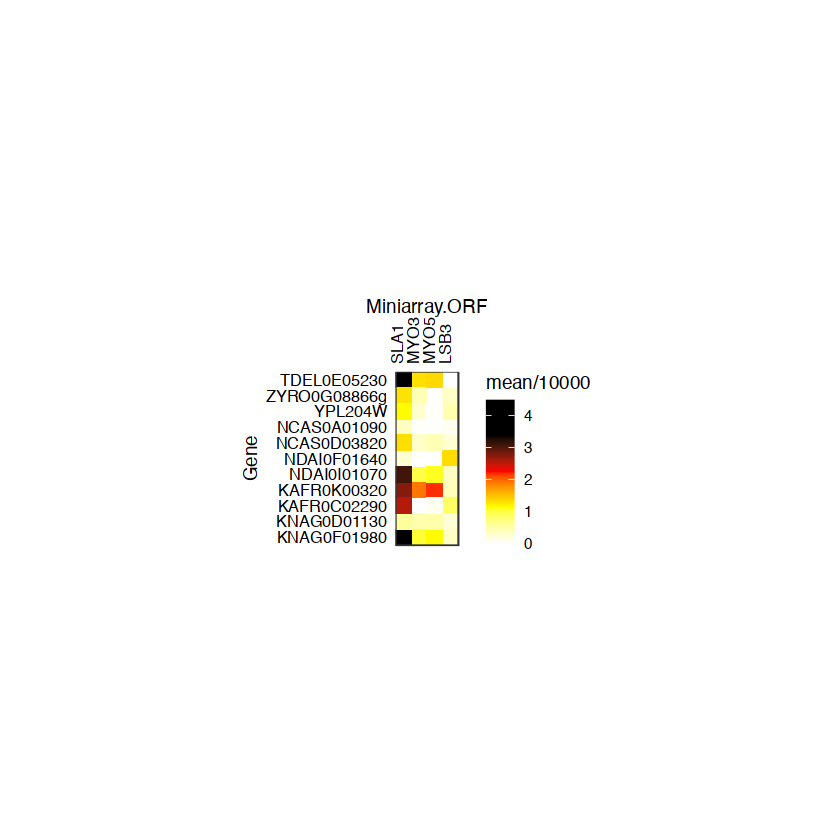

In [374]:
heatmap = ggplot(sh3_ppi_data )+  
geom_tile(aes(Miniarray.ORF,Gene,fill = mean/10000))  +
theme_bw()   + 
theme(
    legend.position='right',
    legend.key = element_blank(), 
    strip.background = element_rect(colour="#FFFFFF", color="#FFFFFF",fill="#FFFFFF",linewidth=1.0),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    panel.background = element_blank(),
    aspect.ratio=4/21,
    axis.ticks  = element_blank(),
    axis.text.x = element_text(color="#000000",size=9.5,angle=90,vjust=0.5,hjust=0),
    axis.text.y = element_text(color="#000000",size=9.5)       )+ 
scale_x_discrete(expand=c(0,0),position = "top") + 
scale_y_discrete(expand=c(0,0),limits=rev ) +
scale_fill_gradientn(colors=c("#FFFFFF","#FFFF00","#FF0000","#000000","#000000"),limits=c(0,4.5))

p <- set_panel_size(heatmap,width  = unit(4/3, "cm"),height = unit(h/3, "cm"))
grid.newpage()
grid.draw(p) 
ggsave(plot=p,"../Output/SH3_PPI_heatmap.pdf")

In [390]:
unique(MSS$PWM_name)
sel_PWM = c('SLA1-1_classI','SLA1-2_classII','SLA1-3','MYO3','MYO5','LSB3')
w = length(sel_PWM)

[1] ABP1                 BBC1_classIIcombined BEM1-1              
 [4] BEM1-2_PXXP          BOI1                 BOI2                
 [7] BZZ1-1               BZZ1-2               CYK3_classI         
[10] CYK3_classII         FUS1                 HOF1                
[13] HSE1                 LSB1_classI          LSB1_classII        
[16] LSB3                 MYO3                 MYO5                
[19] NBP2_PXXP            PEX13_classIIA       PEX13_classIIB      
[22] PIN3_classI          PIN3_classII         RVS167_ClassI       
[25] RVS167_ClassII       SHO1                 SLA1-1_classI       
[28] SLA1-2_classII       SLA1-3               YSC84               
30 Levels: RVS167_ClassII LSB1_classII YSC84 LSB3 PIN3_classII ... BOI1

In [391]:
MSS = MSS %>%filter(PWM_name %in% sel_PWM)
MSS$PWM_name = factor(MSS$PWM_name,levels=sel_PWM)
head(MSS)

Species,Gene,Pos,PWM_name,MSSmax,MSSsum,MSSsumoverTh,n,n_th,dMSSsumoverTh
<chr>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
K.africana,KAFR0C02290,DupB,LSB3,0.411,0.411,0,1,0,0
K.africana,KAFR0C02290,DupB,MYO3,0.374,0.374,0,1,0,0
K.africana,KAFR0C02290,DupB,MYO5,0.418,0.418,0,1,0,0
K.africana,KAFR0C02290,DupB,SLA1-1_classI,0.492,0.492,0,1,0,0
K.africana,KAFR0C02290,DupB,SLA1-2_classII,0.397,0.397,0,1,0,0
K.africana,KAFR0C02290,DupB,SLA1-3,0.594,0.594,0,1,0,0


In [392]:
MSS_l  = melt(MSS,id.vars=c("Species","Gene","PWM_name","Pos"))
head(MSS_l)

,Species,Gene,PWM_name,Pos,variable,value
,<chr>,<fct>,<fct>,<chr>,<fct>,<dbl>
1,K.africana,KAFR0C02290,LSB3,DupB,MSSmax,0.411
2,K.africana,KAFR0C02290,MYO3,DupB,MSSmax,0.374
3,K.africana,KAFR0C02290,MYO5,DupB,MSSmax,0.418
4,K.africana,KAFR0C02290,SLA1-1_classI,DupB,MSSmax,0.492
5,K.africana,KAFR0C02290,SLA1-2_classII,DupB,MSSmax,0.397
6,K.africana,KAFR0C02290,SLA1-3,DupB,MSSmax,0.594


In [393]:
head(MSS)

Species,Gene,Pos,PWM_name,MSSmax,MSSsum,MSSsumoverTh,n,n_th,dMSSsumoverTh
<chr>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
K.africana,KAFR0C02290,DupB,LSB3,0.411,0.411,0,1,0,0
K.africana,KAFR0C02290,DupB,MYO3,0.374,0.374,0,1,0,0
K.africana,KAFR0C02290,DupB,MYO5,0.418,0.418,0,1,0,0
K.africana,KAFR0C02290,DupB,SLA1-1_classI,0.492,0.492,0,1,0,0
K.africana,KAFR0C02290,DupB,SLA1-2_classII,0.397,0.397,0,1,0,0
K.africana,KAFR0C02290,DupB,SLA1-3,0.594,0.594,0,1,0,0


Saving 7 x 7 in image


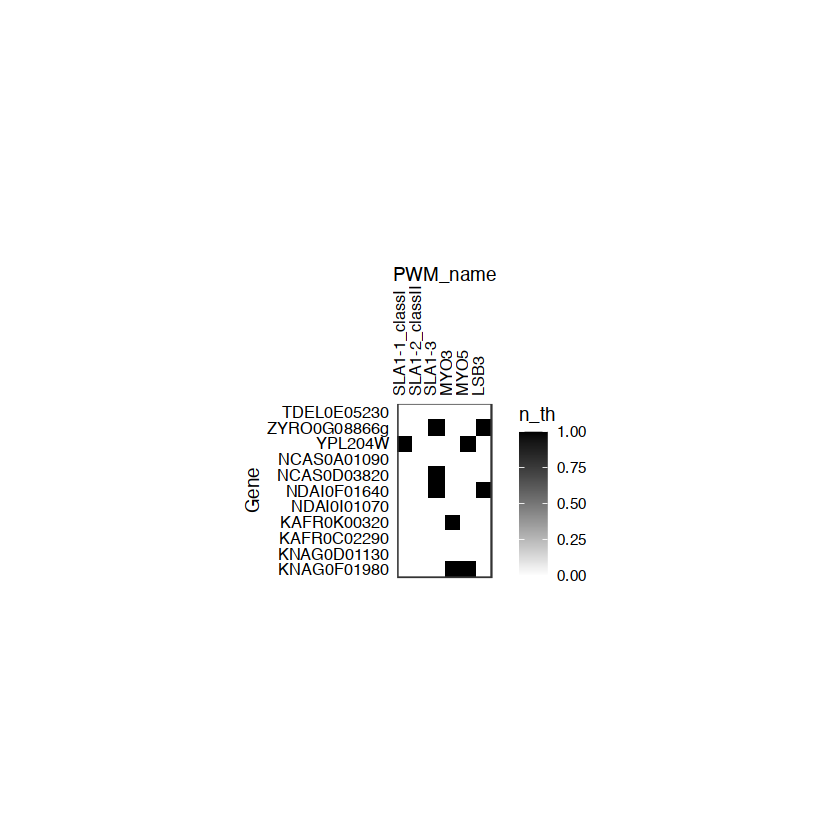

In [394]:
heatmap = ggplot(MSS)+  
geom_tile(aes(PWM_name,Gene,fill = n_th))  +
theme_bw()   + 
theme(
    legend.position='right',
    legend.key = element_blank(), 
    strip.background = element_rect(colour="#FFFFFF", color="#FFFFFF",fill="#FFFFFF",linewidth=1.0),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    panel.background = element_blank(),
    aspect.ratio=1,
    axis.ticks  = element_blank(),
    axis.text.x = element_text(color="#000000",size=9.5,angle=90,vjust=0.5,hjust=0),
    axis.text.y = element_text(color="#000000",size=9.5)       )+ 
scale_x_discrete(expand=c(0,0),position = "top") + 
scale_y_discrete(expand=c(0,0),limits=rev ) +
scale_fill_gradientn(colors=c("#FFFFFF","#000000"),limits=c())

p <- set_panel_size(heatmap,width  = unit(w/3, "cm"),height = unit(h/3, "cm"))
grid.newpage()
grid.draw(p) 

ggsave(plot=p,"../Output/SH3_PMW_heatmap_NaboveTh.pdf")

Saving 7 x 7 in image


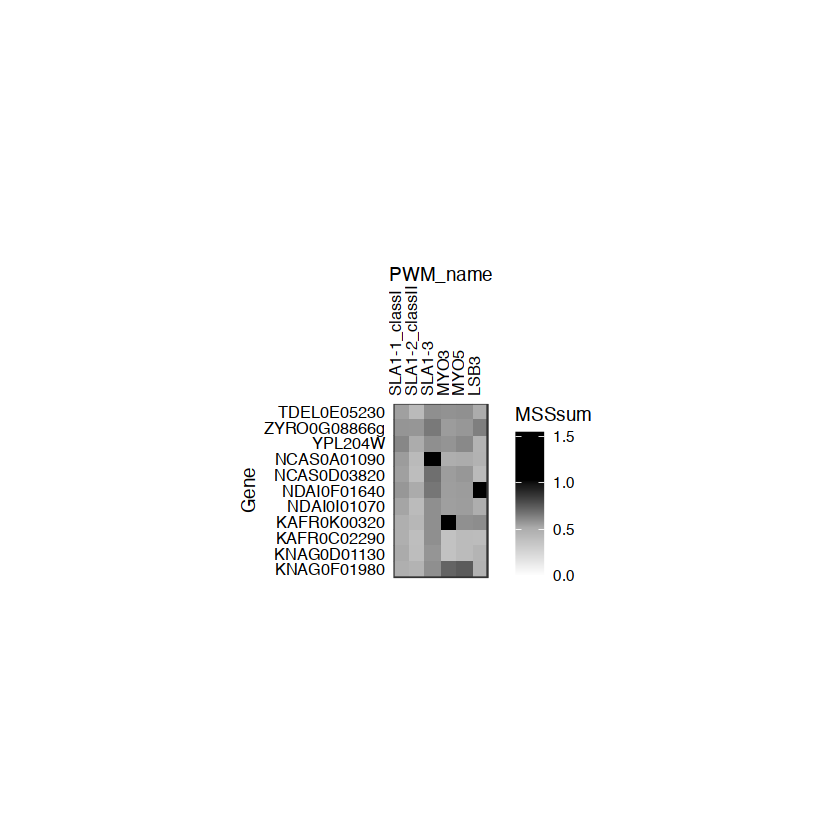

In [404]:
heatmap = ggplot(MSS)+  
geom_tile(aes(PWM_name,Gene,fill = MSSsum))  +
theme_bw()   + 
theme(
    legend.position='right',
    legend.key = element_blank(), 
    strip.background = element_rect(colour="#FFFFFF", color="#FFFFFF",fill="#FFFFFF",linewidth=1.0),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    panel.background = element_blank(),
    aspect.ratio=1,
    axis.ticks  = element_blank(),
    axis.text.x = element_text(color="#000000",size=9.5,angle=90,vjust=0.5,hjust=0),
    axis.text.y = element_text(color="#000000",size=9.5)       )+ 
scale_x_discrete(expand=c(0,0),position = "top") + 
scale_y_discrete(expand=c(0,0),limits=rev ) +
scale_fill_gradientn(colors=c("#FFFFFF","#ababab","#000000","#000000"),limits=c(0,1.55),na.value="#FF0000")

p <- set_panel_size(heatmap,width  = unit(w/3, "cm"),height = unit(h/3, "cm"))
grid.newpage()
grid.draw(p) 

ggsave(plot=p,"../Output/SH3_PMW_heatmap_MSSsum.pdf")

Saving 7 x 7 in image


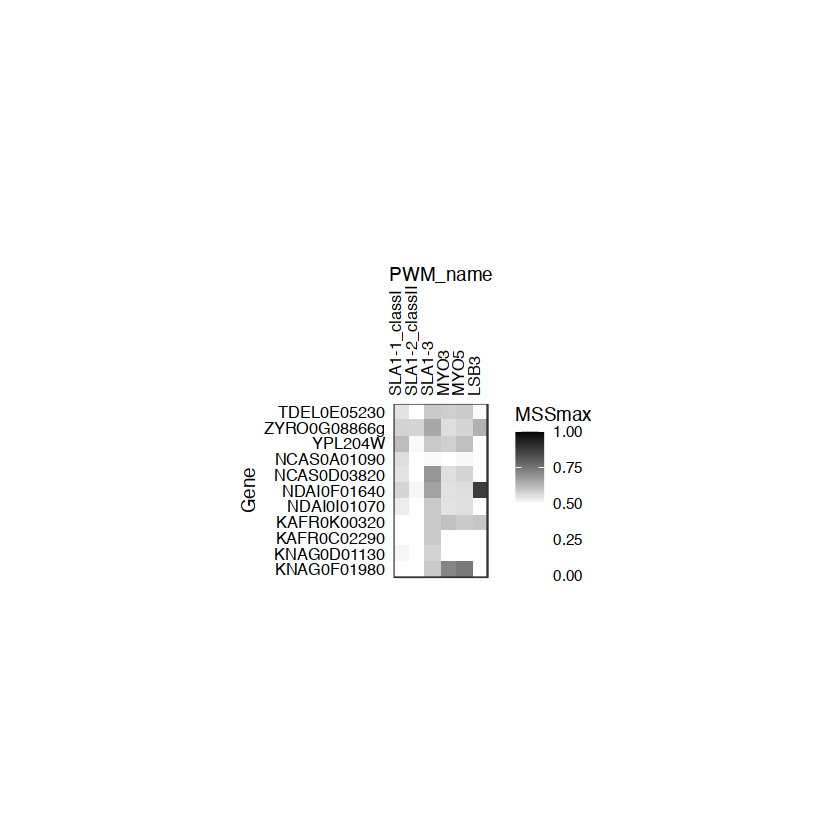

In [395]:
heatmap = ggplot(MSS)+  
geom_tile(aes(PWM_name,Gene,fill = MSSmax))  +
theme_bw()   + 
theme(
    legend.position='right',
    legend.key = element_blank(), 
    strip.background = element_rect(colour="#FFFFFF", color="#FFFFFF",fill="#FFFFFF",linewidth=1.0),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    panel.background = element_blank(),
    aspect.ratio=1,
    axis.ticks  = element_blank(),
    axis.text.x = element_text(color="#000000",size=9.5,angle=90,vjust=0.5,hjust=0),
    axis.text.y = element_text(color="#000000",size=9.5)       )+ 
scale_x_discrete(expand=c(0,0),position = "top") + 
scale_y_discrete(expand=c(0,0),limits=rev ) +
scale_fill_gradientn(colors=c("#FFFFFF","#FFFFFF","#000000"),limits=c(0,1),na.value="#FFFFFF")

p <- set_panel_size(heatmap,width  = unit(w/3, "cm"),height = unit(h/3, "cm"))
grid.newpage()
grid.draw(p) 

ggsave(plot=p,"../Output/SH3_PMW_heatmap_MSSmax.pdf")

Saving 7 x 7 in image


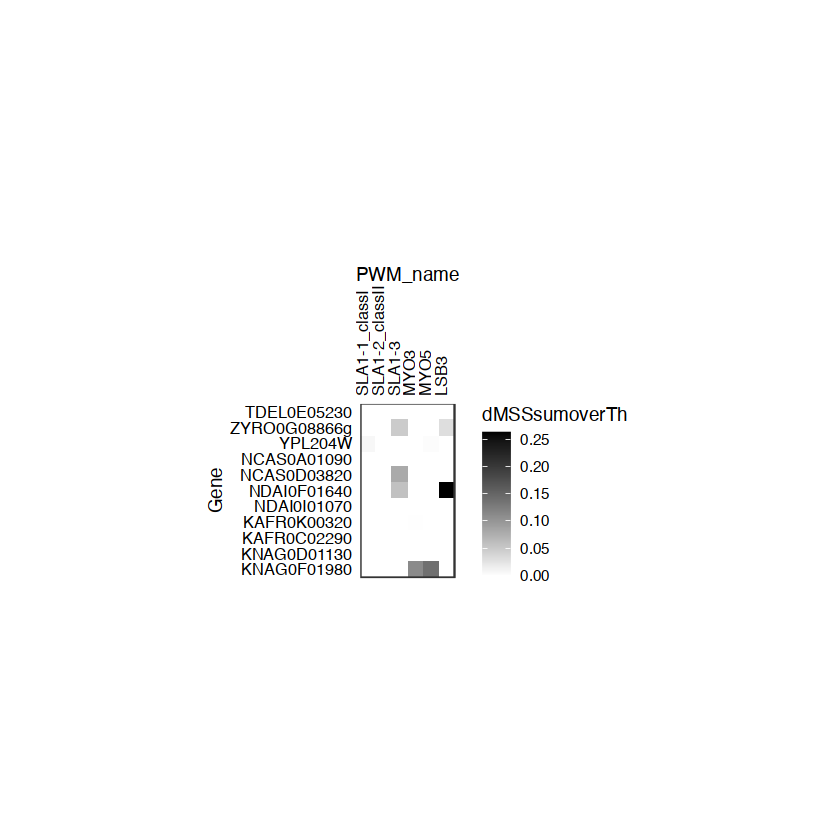

In [396]:


heatmap = ggplot(MSS)+  
geom_tile(aes(PWM_name,Gene,fill = dMSSsumoverTh))  +
theme_bw()   + 
theme(
    legend.position='right',
    legend.key = element_blank(), 
    strip.background = element_rect(colour="#FFFFFF", color="#FFFFFF",fill="#FFFFFF",linewidth=1.0),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    panel.background = element_blank(),
    aspect.ratio=1,
    axis.ticks  = element_blank(),
    axis.text.x = element_text(color="#000000",size=9.5,angle=90,vjust=0.5,hjust=0),
    axis.text.y = element_text(color="#000000",size=9.5)       )+ 
scale_x_discrete(expand=c(0,0),position = "top") + 
scale_y_discrete(expand=c(0,0),limits=rev ) +
scale_fill_gradientn(colors=c("#FFFFFF","#000000"),limits=c())

p <- set_panel_size(heatmap,width  = unit(w/3, "cm"),height = unit(h/3, "cm"))
grid.newpage()
grid.draw(p) 

ggsave(plot=p,"../Output/SH3_PMW_heatmap_dMSSsumoverTh.pdf")

Saving 7 x 7 in image


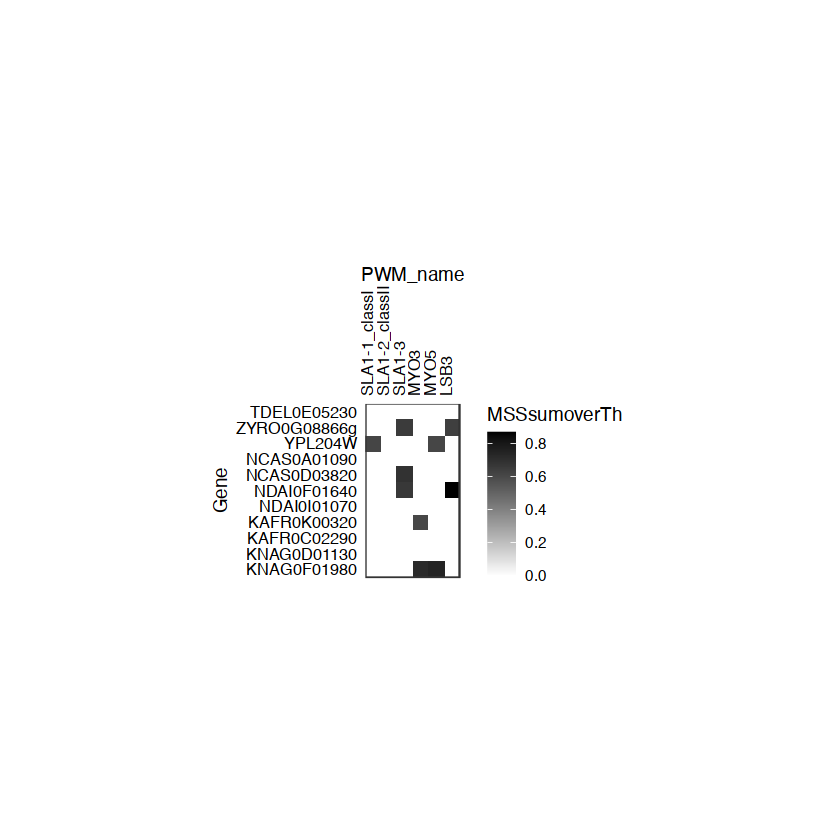

In [397]:


heatmap = ggplot(MSS)+  
geom_tile(aes(PWM_name,Gene,fill = MSSsumoverTh))  +
theme_bw()   + 
theme(
    legend.position='right',
    legend.key = element_blank(), 
    strip.background = element_rect(colour="#FFFFFF", color="#FFFFFF",fill="#FFFFFF",linewidth=1.0),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    panel.background = element_blank(),
    aspect.ratio=1,
    axis.ticks  = element_blank(),
    axis.text.x = element_text(color="#000000",size=9.5,angle=90,vjust=0.5,hjust=0),
    axis.text.y = element_text(color="#000000",size=9.5)       )+ 
scale_x_discrete(expand=c(0,0),position = "top") + 
scale_y_discrete(expand=c(0,0),limits=rev ) +
scale_fill_gradientn(colors=c("#FFFFFF","#000000"),limits=c())

p <- set_panel_size(heatmap,width  = unit(6/3, "cm"),height = unit(h/3, "cm"))
grid.newpage()
grid.draw(p) 

ggsave(plot=p,"../Output/SH3_PMW_heatmap_MSSsumoverTh.pdf")